In [53]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from SSA_Decomposition import ssa_decomposition

font = {'size': 12}
matplotlib.rc('font', **font)

In [54]:
# The PPG signal (sampled at 25Hz)
data_csv = pd.read_csv('ppg.csv')
fs = 25
# Extract ppg and acceleromter signals between 200s and 400s
ppg = data_csv['ppg'][200*fs:400*fs].to_numpy()
acc_x = data_csv['acc_x'][200*fs:400*fs].to_numpy()
acc_y = data_csv['acc_y'][200*fs:400*fs].to_numpy()
acc_z = data_csv['acc_z'][200*fs:400*fs].to_numpy()
acc_norm = np.sqrt(acc_x*acc_x+acc_y*acc_y+acc_z*acc_z)

time = np.arange(0, len(ppg)/fs, 1/fs)

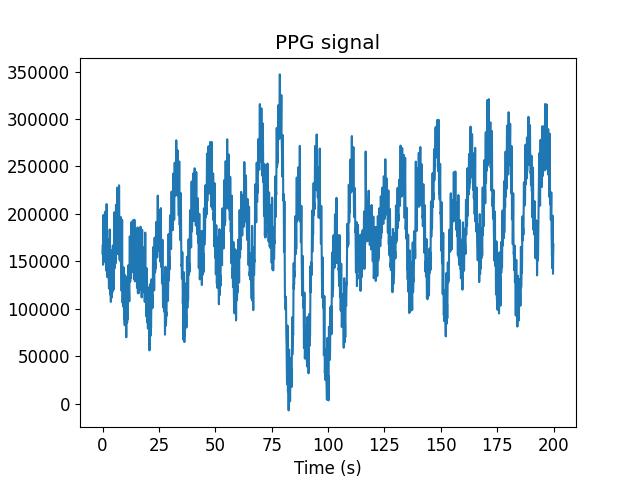

In [55]:
# Plot data
fig = plt.figure()
plt.plot(time, ppg)
plt.title('PPG signal')
plt.ylabel('PPG')
plt.xlabel('Time (s)')
plt.show()

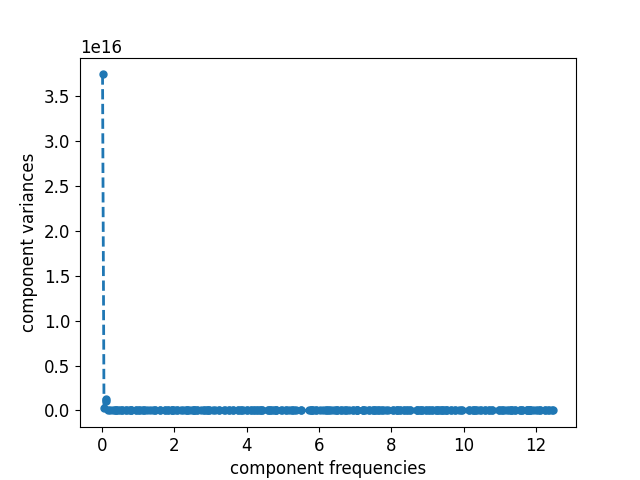

In [56]:
# First SSA decomposition to extract long term drift
# Find the length L in samples, so that SVD first component corresponds to
# long term drift signal.
L = 10*fs
Y_1, fc_1, sig_1 = ssa_decomposition(ppg, L, fs, 2)

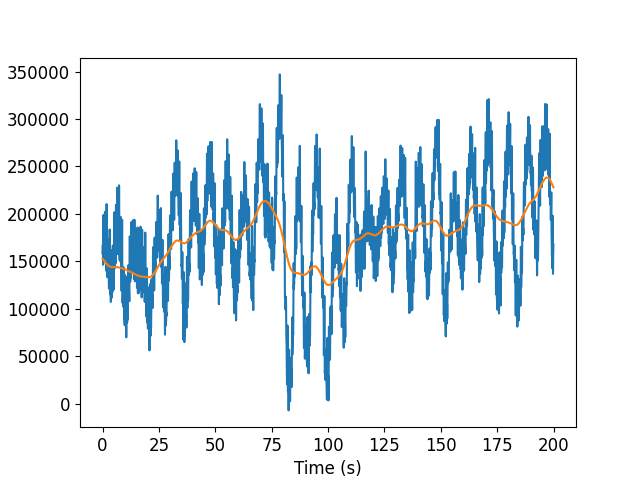

In [57]:
# Plot signal and its baseline 
fig = plt.figure()
plt.plot(time, ppg)
plt.plot(time, Y_1[:, 0].flatten(), label='baseline')
plt.ylabel('PPG')
plt.xlabel('Time (s)')
plt.show()

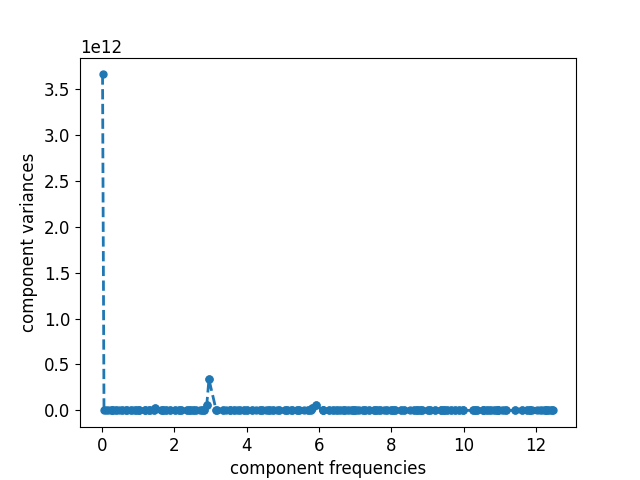

In [58]:
# First SSA decomposition to extract long term drift from accelerometer
Y_acc1, fc_acc1, sig_acc1 = ssa_decomposition(acc_norm, L, fs, 2)

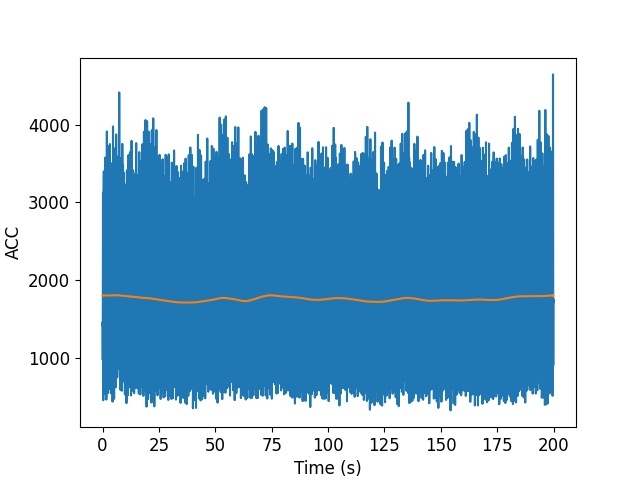

In [59]:
fig = plt.figure()
plt.plot(time, acc_norm)
plt.plot(time, Y_acc1[:, 0].flatten(), label='baseline')
plt.ylabel('ACC')
plt.xlabel('Time (s)')
plt.show()

### Question 3.1

One finds that $L = 10f_s$ is a good window length and highlights well the long-term drifting component for both PPG and accelerometer signals. Moreover one can see that the orange line follows more or less the original signal.

### Question 3.2

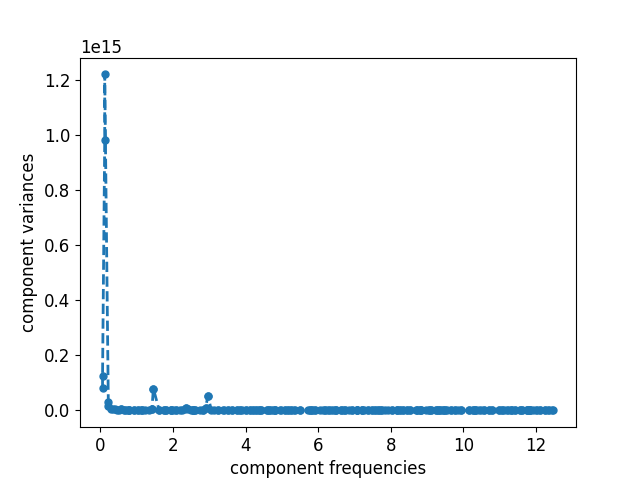

In [60]:
# Remove First component
filt_x = ppg - Y_1[:, 0]
# Apply SSA on signal without baseline
# Set L to identify and remove respiration component
Y_2, fc_2, sig_2 = ssa_decomposition(filt_x, L, fs, 2)

### Question 3.2 a)

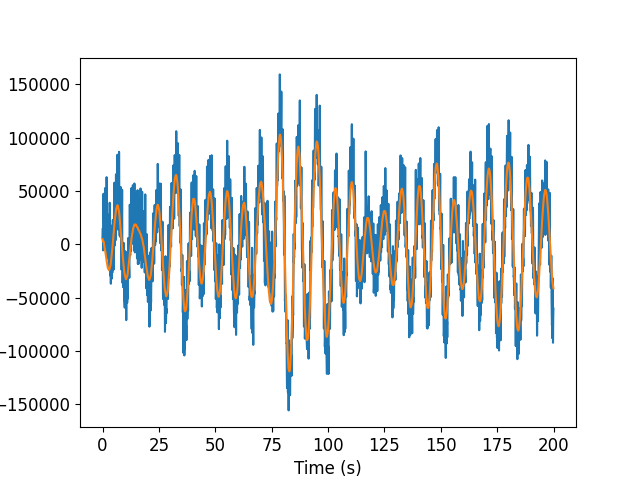

In [66]:
# Find components characterizing respiration
resp_components = [0, 1, 3]
fig = plt.figure()
plt.plot(time, filt_x)
plt.plot(time, np.sum(Y_2[:, resp_components], axis=1), label='Respiration')
plt.ylabel('PPG')
plt.xlabel('Time (s)')
plt.show()

### Question 3.2 b)

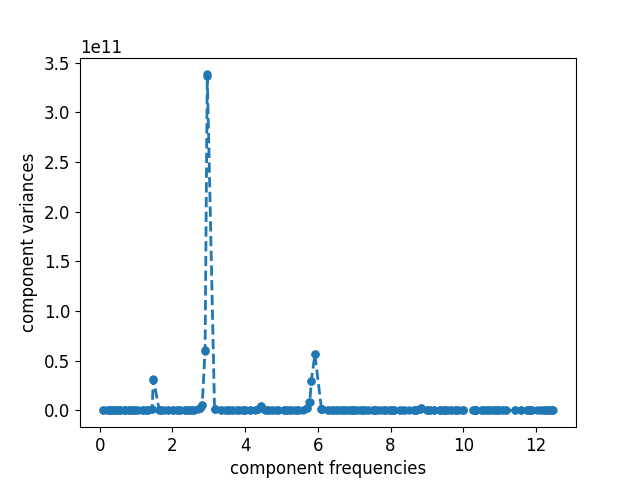

In [62]:
# Remove First component
filt_acc = acc_norm - Y_acc1[:, 0]
# Apply SSA on accelerometer norm without baseline
Y_acc2, fc_acc2, sig_acc2 = ssa_decomposition(filt_acc, L, fs, 2)

One reads on the graph above a dominant frequency of 3 steps per second (which corresponds to the 180 steps per minute), representing the cadence.

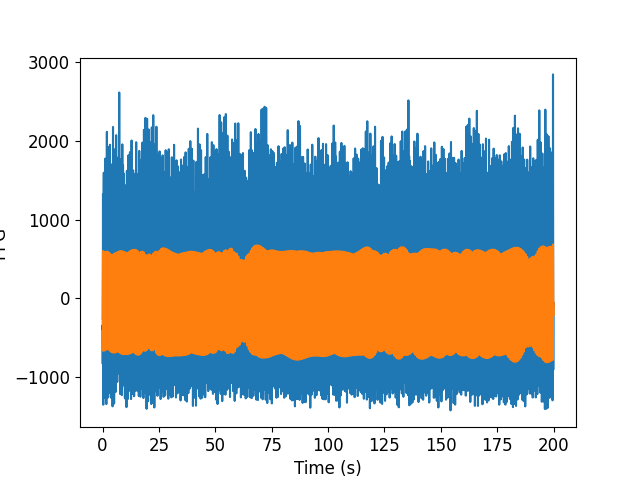

In [63]:
cadence_components = [1,3,6]
fig = plt.figure()
plt.plot(time, filt_acc)
plt.plot(time, np.sum(Y_acc2[:, cadence_components], axis=1), label='Cadence')
plt.ylabel('PPG')
plt.xlabel('Time (s)')
plt.show()

### Question 3.2 c)

- The 1.5 Hz component comes from the arm movement, which corresponds to half of the step frequency (c.f. Lab 4).

- The frequency at 6Hz corresponds to the first harmonic of the step frequency (3Hz)

### Question 3.3

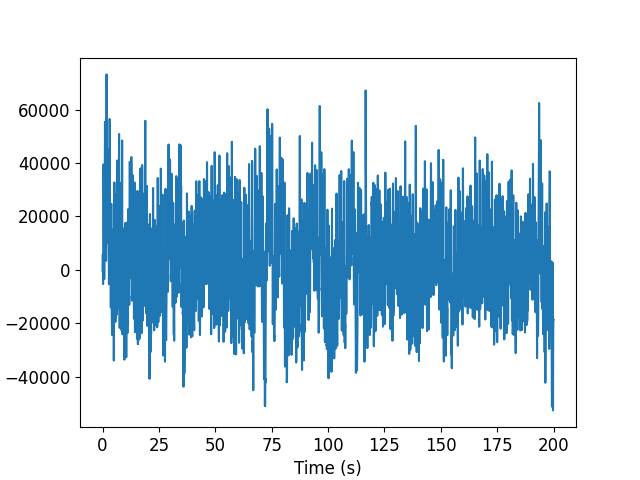

In [64]:
# Remove respiration component(s)
filt_x2 = filt_x - np.sum(Y_2[:, resp_components], 1)
fig = plt.figure()
plt.plot(time, filt_x2)
plt.ylabel('PPG')
plt.xlabel('Time (s)')
plt.show()

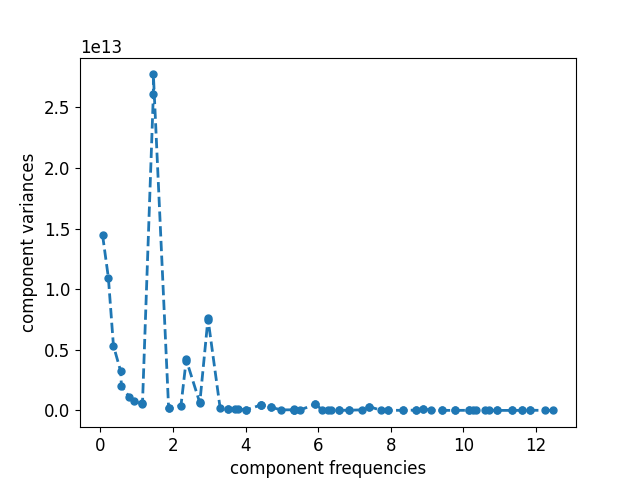

In [65]:
# Apply SSA on signal without baseline, nor respiration
# Set L to identify running cadence and heart rate
Y_3, fc_3, sig_3 = ssa_decomposition(filt_x2, 80, fs, 2)

From the above graph, one can observe a strong component at ~1.5Hz, coresponding to 90 bpm which is coherent with the activity done by the subject.